# CLASSIFICATION ALGORITHM - KNN

## Load Data

In [1]:
# import the dataset
# sklearns has a few in-built datasets
from sklearn.datasets import load_iris

"""
The Iris Dataset contains four features 
(length and width of sepals and petals) of 50 samples 
of three species of Iris 
(Iris setosa, Iris virginica and Iris versicolor). """

'\nThe Iris Dataset contains four features \n(length and width of sepals and petals) of 50 samples \nof three species of Iris \n(Iris setosa, Iris virginica and Iris versicolor). '

In [2]:
# get our dataset
iris_dataset = load_iris()
type(iris_dataset)


# returns a new type of object, called a bunch object -> very similar to a dictionary
#iris_dataset

sklearn.utils._bunch.Bunch

In [3]:
# these datasets actually have some nice metadata
#print(iris_dataset['DESCR'])
#print(iris_dataset['data'])
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# let's put all the data we need in a more readable format -> pandas dataframe
import pandas as pd
features = pd.DataFrame(iris_dataset['data'], columns = iris_dataset['feature_names'])
display(features.shape)
features.head()

(150, 4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
labels = pd.Series(iris_dataset['target'],name='label')
display(labels.shape)
labels.head()

final = pd.concat([features, labels], axis = 1)
final.tail()

(150,)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## Analyze the data

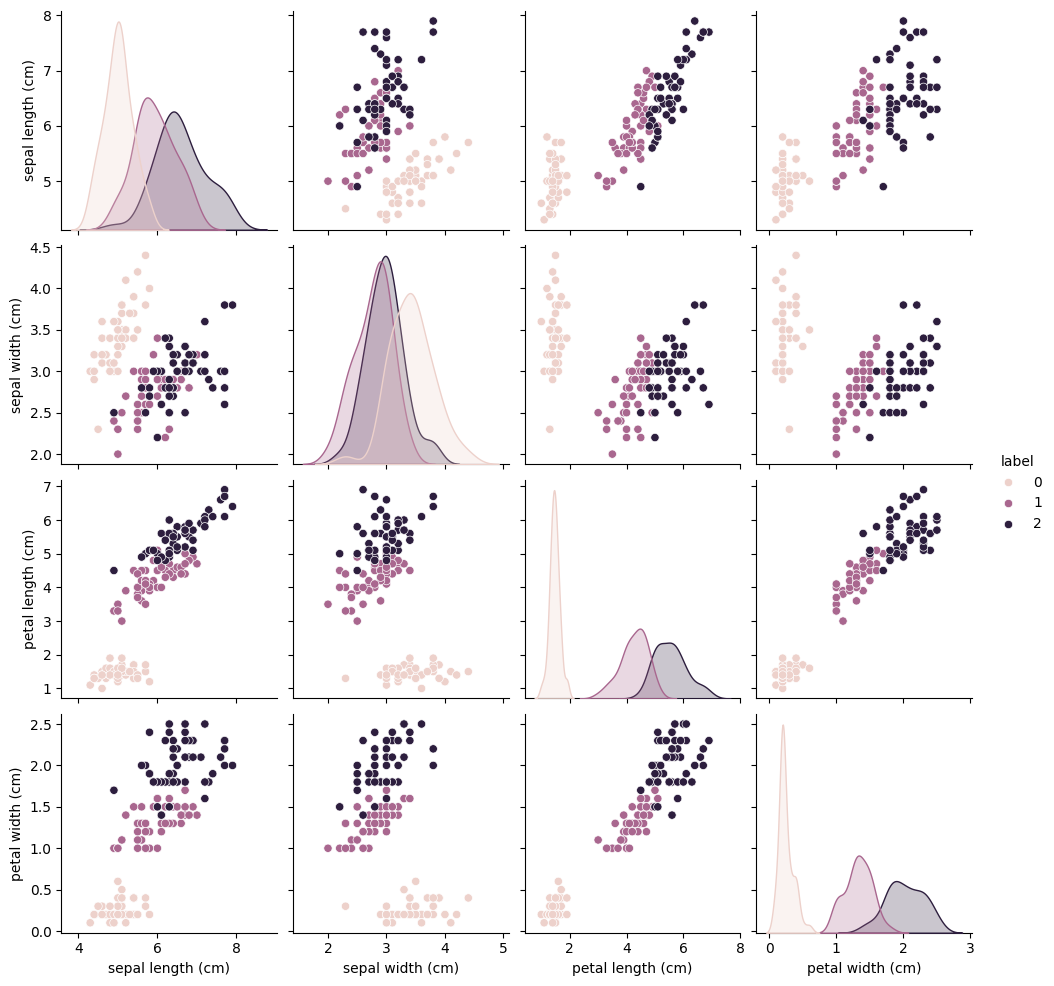

In [6]:
#we can see that all features are pretty reasonable predictors
import seaborn as sns
sns.pairplot(final, hue = 'label')

## Build a model to classify new flowers

### Hide imagine

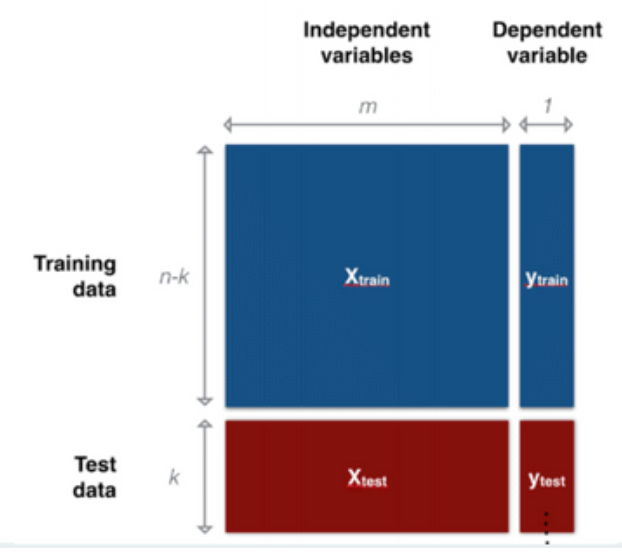

### Prepare the data

In [7]:
# Let's get to the machine learnign part!!
# split our data into training and test datasets

#final.info()

######## BUILD TRAIN DATA #########
# X_train: 4 features and only 80% of the data points
X_train = final.iloc[0:120, 0:4]

# y_train: label and the same 80% of the data:
y_train = final.iloc[0:120, 4]
####################################

######## BUILD TEST DATA ########
# X_test: 4 features and THE OTHER 20% of the data points
X_test = final.iloc[120:150, 0:4]

# y_test: label and the same 20% of the data:
y_test = final.iloc[120:150, 4]
####################################

#X_train.info()
#y_train.describe()
#X_test.info()
#y_test.describe()

In [8]:
## Logically, there is a python package for this...
from sklearn.model_selection import train_test_split

# sklearn accepts both numpy arrays and pandas dataframes
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 0, test_size = 0.20) 
#X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state = 0, test_size = 0.25) 

#random_state for reproducibility
#test_size = 0.25 by default but you can set it

#X_train.info()
y_train.describe()
#X_test.info()
#y_test.describe()

count    120.000000
mean       1.041667
std        0.834103
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: label, dtype: float64

## Just this once, lets build the model by hand

### Lets discuss this in a 2D world:

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

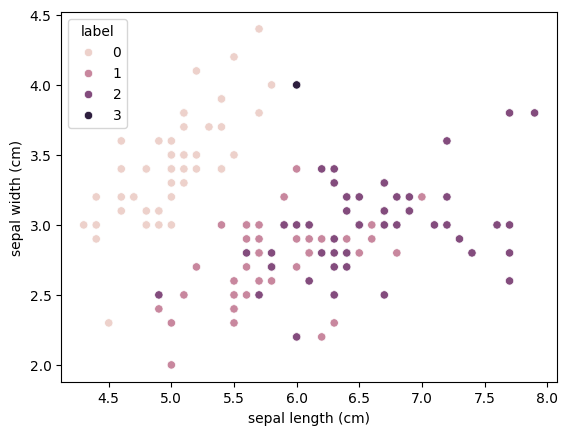

In [9]:
import seaborn as sns
#sns.scatterplot(data=final, x='sepal length (cm)', y='sepal width (cm)' , hue = 'label')

# A wild new_point as appeared
new_point = pd.DataFrame([[6, 4, 3]], columns=['sepal length (cm)', 'sepal width (cm)', 'label'])
sns.scatterplot(data=pd.concat([final, new_point]), x='sepal length (cm)', y='sepal width (cm)' , hue = 'label')

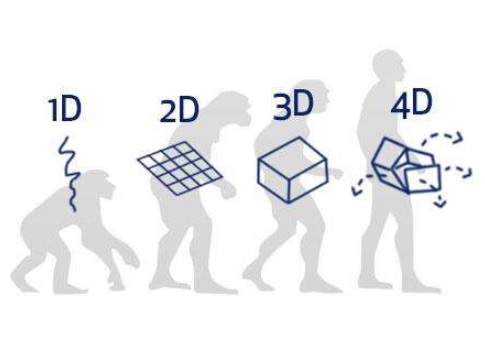

### Compute Distance in 2D

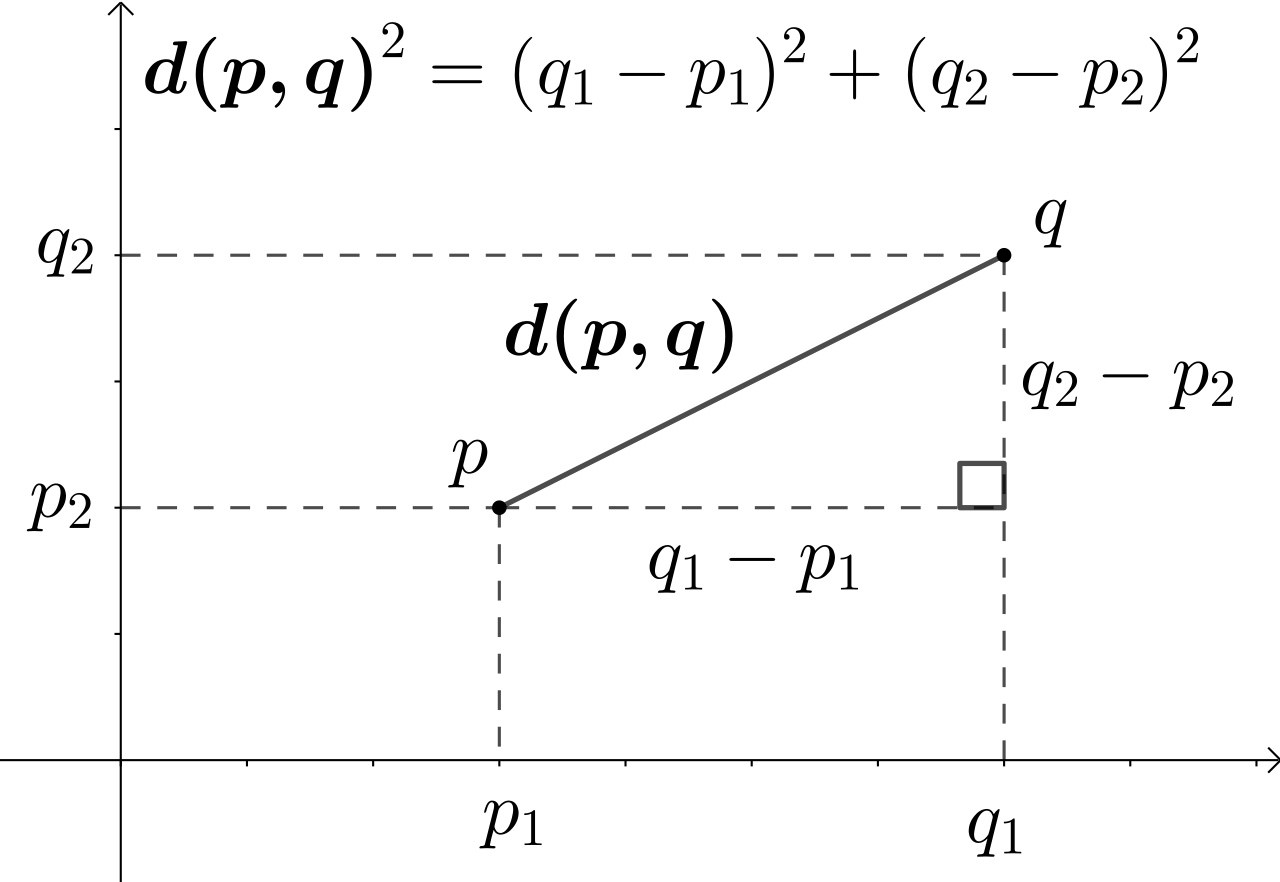

### Compute the Distance and get the label....... in 4D

In [10]:
### Steps we need to take to build our model:
# #1: Build a function that computes the distance of the new entry point and all the data points
# #2: Check the labels the k-nearest-neighbours of the new data point 
# #3: Assign the label of the majority of the surronding data points to the new datapoint

import numpy as np
from scipy import stats

final.describe()

new_point = pd.DataFrame([[6, 4, 5, 0.5, 8]], \
                         columns=['sepal length (cm)', \
                                  'sepal width (cm)', \
                                  'petal length (cm)', \
                                  'petal width (cm)', \
                                  'label'])
print(type(new_point))
print(new_point)

<class 'pandas.core.frame.DataFrame'>
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  6                 4                  5               0.5   

   label  
0      8  


In [11]:
######## STEP 0 ###############
# Compute distance for one point
dist_sqr = (X_train.iloc[0, 0] - new_point.iloc[0,0])**2 \
         + (X_train.iloc[0, 1] - new_point.iloc[0,1])**2 \
         + (X_train.iloc[0, 2] - new_point.iloc[0,2])**2 \
         + (X_train.iloc[0, 3] - new_point.iloc[0,3])**2
dist = np.sqrt(dist_sqr)
print(dist)

# Of course there is a easier way to do this...
dist = np.linalg.norm(X_train.iloc[0, 0:4]-new_point.iloc[0, 0:4])
print(dist)

1.705872210923198
1.705872210923198


In [12]:
######## STEP 1 ###############
# Compute distances for all the points:

euc_distances = pd.DataFrame(columns = ['dist'])
for i in range(0, len(X_train.index)):
  #print(i)
  X_train.iloc[i, 0:4]
  dist = np.linalg.norm(X_train.iloc[i, 0:4]-new_point.iloc[0, 0:4])
  euc_distances.loc[i] = dist
  
euc_distances.head()

,dist
0,1.705872
1,1.615549
2,3.637307
3,1.646208
4,2.202272


In [13]:
######## STEP 2 ###############
k_nearest_neighbours = euc_distances.nsmallest(5, 'dist')
print(k_nearest_neighbours.index)

Index([30, 22, 36, 41, 109], dtype='int64')


In [14]:
######## STEP 3 ###############
## Get the 5 labels:
label_1 = y_train.iloc[k_nearest_neighbours.index[0]]
label_2 = y_train.iloc[k_nearest_neighbours.index[1]]
label_3 = y_train.iloc[k_nearest_neighbours.index[2]]
label_4 = y_train.iloc[k_nearest_neighbours.index[3]]
label_5 = y_train.iloc[k_nearest_neighbours.index[4]]

labels = np.array([label_1, label_2, label_3, label_4, label_5])
new_point_label = int(stats.mode(labels)[0])
print(f'The label of the new point is {new_point_label}')

The label of the new point is 1


## KNN using Scikit Learn: of course Python has a way to do this...

#### Build out model and make a prediction for "new_point"

In [15]:
# Create an instance of the model
# we've seen this already but it bears repeating: sklearn and ML packages in general require you to create an empty model before you use it
# think of it as creating an empty list before an .append() loop or something similar
from sklearn.neighbors import KNeighborsClassifier

# define hyperparameters here
knn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
# trainin in sklearn and other python ML packages is called "fit" 
# we naturally need to train in our data
knn.fit(X_train, y_train)

# your model is ready to make predictions!!! 

KNeighborsClassifier()

In [17]:
# Lets see the model in action
knn.predict([new_point.iloc[0, 0:4]])

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

#### But how good is our model?

In [18]:
# evaluate our fit model compared to our test dataset
y_predict = knn.predict(X_test)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

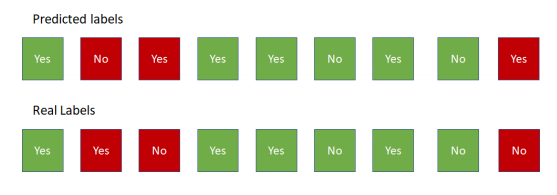

In [19]:
# What is this score?
from sklearn import metrics
metrics.accuracy_score(y_test, y_predict)

0.9666666666666667

Retorical question: is this the only way to evaluate a model?

#### Overfitting - for later classes

In [20]:
#overfitting - what happens when you start bringing more and more information in
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test,  y_test))

0.9416666666666667
1.0


In [21]:
#overfitting - what happens when you start bringing more and more information in
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test,  y_test))

0.7666666666666667
0.5666666666666667
